In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from nsepy import get_history
from datetime import date

## Extracting the Data :

In [2]:
# symbol = ["NIFTY 50","NIFTY NEXT 50","NIFTY MIDCAP SELECT","NIFTY BANK","NIFTY FINANCIAL SERVICES"]

symbol = ["NIFTY 50"]

df = []
df = pd.DataFrame(df)

for x in symbol:
    data = get_history(symbol=x, start=date(2012,3,1), end=date(2022,3,1), index = True)
    data = pd.DataFrame(data)
    data['Index_Name'] = x
    df = pd.concat([df,data])
    print(x)

NIFTY 50


In [3]:
df.head()

,Open,High,Low,Close,Volume,Turnover,Index_Name
Date,,,,,,,
2012-03-01,5366.00,5372.45,5297.50,5339.75,196867905,6.847630e+10,NIFTY 50
2012-03-02,5369.45,5392.55,5315.05,5359.35,185021526,6.768520e+10,NIFTY 50
2012-03-03,5360.05,5369.60,5353.40,5359.40,16770991,4.293500e+09,NIFTY 50
2012-03-05,5342.55,5344.50,5265.70,5280.35,196421155,6.036630e+10,NIFTY 50
2012-03-06,5266.00,5382.05,5206.40,5222.40,290396014,9.319010e+10,NIFTY 50


In [4]:
df.to_csv("NSE_Extracted_data.csv", index=True)

In [159]:
df = pd.read_csv("NSE_Extracted_data.csv", header=0, index_col=0, parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Turnover,Index_Name
Date,,,,,,,
2012-03-01,5366.00,5372.45,5297.50,5339.75,196867905,6.847630e+10,NIFTY 50
2012-03-02,5369.45,5392.55,5315.05,5359.35,185021526,6.768520e+10,NIFTY 50
2012-03-03,5360.05,5369.60,5353.40,5359.40,16770991,4.293500e+09,NIFTY 50
2012-03-05,5342.55,5344.50,5265.70,5280.35,196421155,6.036630e+10,NIFTY 50
2012-03-06,5266.00,5382.05,5206.40,5222.40,290396014,9.319010e+10,NIFTY 50


## EDA (Exploratory Data Analysis) :

In [6]:
df.shape

(2477, 7)

In [7]:
df.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Turnover      float64
Index_Name     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2477 entries, 2012-03-01 to 2022-02-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2477 non-null   float64
 1   High        2477 non-null   float64
 2   Low         2477 non-null   float64
 3   Close       2477 non-null   float64
 4   Volume      2477 non-null   int64  
 5   Turnover    2477 non-null   float64
 6   Index_Name  2477 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 154.8+ KB


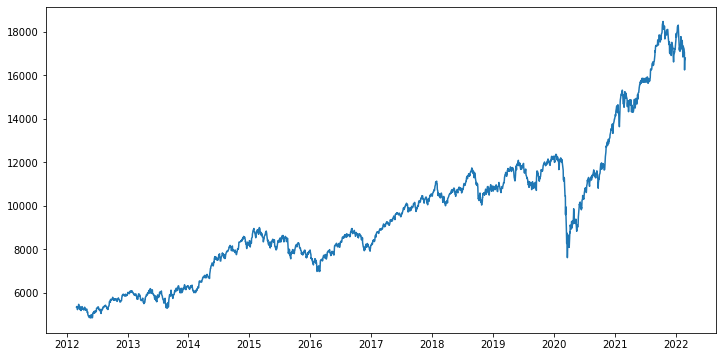

In [9]:
# Line Plot :

plt.figure(figsize=(12,6))
plt.plot(df["Close"])
plt.show()

<AxesSubplot:ylabel='Date'>

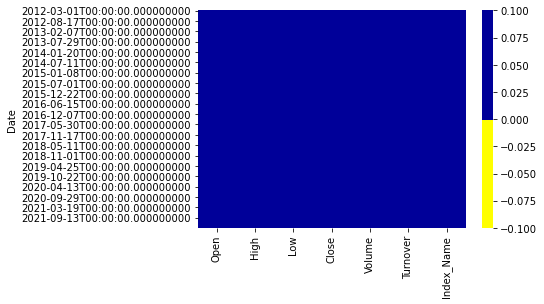

In [10]:
# Missing Values and Imputation :
import seaborn as sns

cols = df.columns 
colours = ['#ffff00','#000099'] 

sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))


<AxesSubplot:>

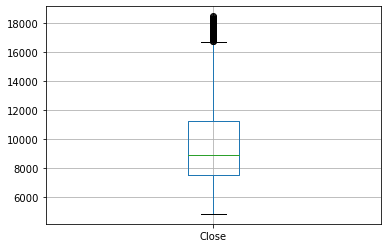

In [11]:
# Boxplot :

df.boxplot(column = "Close")

In [12]:
# Descriptive Stats :

df["Close"].describe()

count     2477.000000
mean      9594.080319
std       3189.703535
min       4835.650000
25%       7555.200000
50%       8895.300000
75%      11234.350000
max      18477.050000
Name: Close, dtype: float64

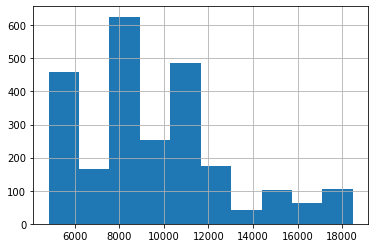

In [13]:
# Histogram :

df["Close"].hist()
pyplot.show()

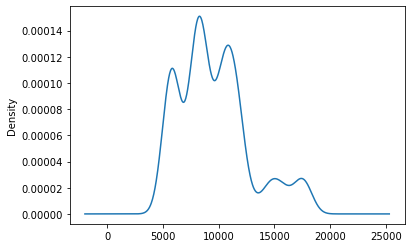

In [14]:
# Density Plot :

df["Close"].plot(kind="kde")
pyplot.show()

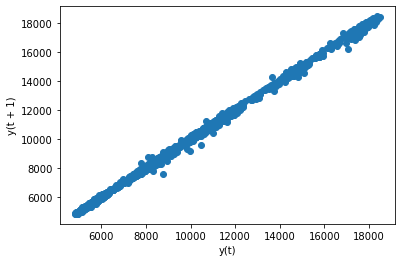

In [15]:
# Scatter Plot :

from pandas.plotting import lag_plot

lag_plot(df["Close"])
pyplot.show()

In [162]:
# Pair Plot :
sns.pairplot(data)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

In [17]:
# Test for Stationarity (Dickey Fuller Test) :

from statsmodels.tsa.stattools import adfuller

def TestStationaryAdfuller(df, cutoff = 0.01):
    df_test = adfuller(df, autolag = 'AIC')
    df_test_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_test_output['Critical Value (%s)'%key] = value
    print(df_test_output)
    
    if df_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")

In [18]:
#Define Stationary Plot

def TestStationaryPlot(df):
    rol_mean = df.rolling(window = 20, center = False).mean()
    rol_std = df.rolling(window = 20, center = False).std()
    
    plt.figure(figsize=(12,6))
    plt.plot(df, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.xlabel('Time in Years', fontsize = 12)
    plt.ylabel('Total Emissions', fontsize = 12)
    plt.legend(loc='best', fontsize = 12)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 12)
    plt.show(block= True)

In [19]:
# Test for Stationarity

#dataframe df

TestStationaryAdfuller(df["Close"].dropna(inplace=False))

Test Statistic                    0.047173
p-value                           0.962264
#Lags Used                       12.000000
Number of Observations Used    2464.000000
Critical Value (1%)              -3.433007
Critical Value (5%)              -2.862714
Critical Value (10%)             -2.567395
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


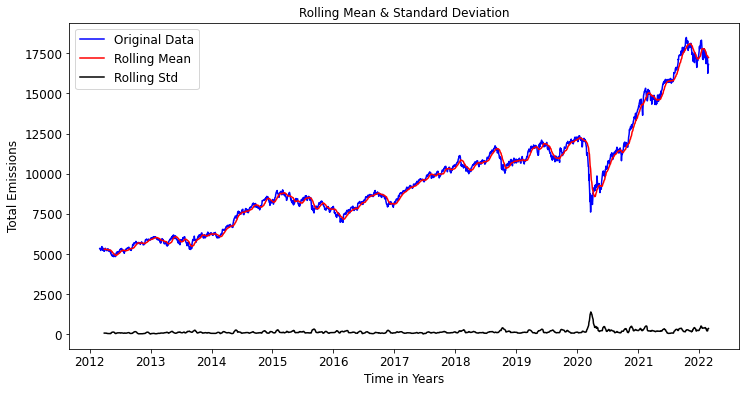

In [20]:
TestStationaryPlot(df["Close"])

In [21]:
#Data is non-stationary so we will use differencing
# Differencing :

df_first_difference = df[["Close"]] - df[["Close"]].shift(1)

df_first_difference.head()

,Close
Date,
2012-03-01,NaN
2012-03-02,19.60
2012-03-03,0.05
2012-03-05,-79.05
2012-03-06,-57.95


In [22]:
# test dickey fuller test on differenced data
# dataframe df_first_difference

TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                -1.383196e+01
p-value                        7.563461e-26
#Lags Used                     1.100000e+01
Number of Observations Used    2.464000e+03
Critical Value (1%)           -3.433007e+00
Critical Value (5%)           -2.862714e+00
Critical Value (10%)          -2.567395e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


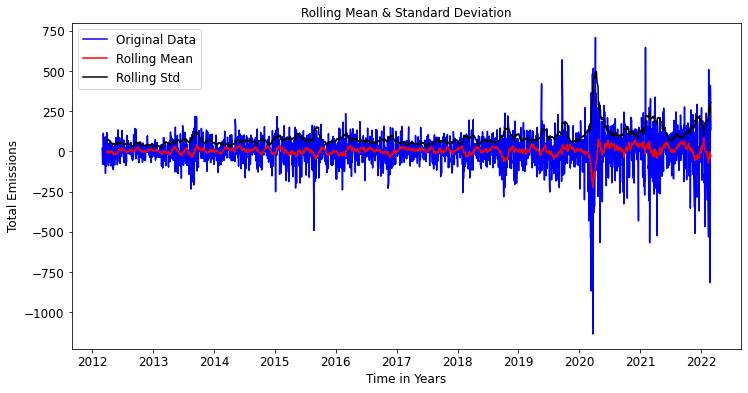

In [23]:
TestStationaryPlot(df_first_difference)

#The first difference improves the stationarity of the series significantly. 
#Let us use the seasonal first order difference to remove the seasonality of the data and see how that impacts stationarity of the data.

In [24]:
#Seasonal First order differencing

data_seasonal_first_difference = df_first_difference - df_first_difference.shift(12)

data_seasonal_first_difference.head()

,Close
Date,
2012-03-01,NaN
2012-03-02,NaN
2012-03-03,NaN
2012-03-05,NaN
2012-03-06,NaN


In [25]:
## Again test dickey fuller test on data_CO2_seasonal_first_difference

TestStationaryAdfuller(data_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.509872e+01
p-value                        7.997728e-28
#Lags Used                     2.600000e+01
Number of Observations Used    2.437000e+03
Critical Value (1%)           -3.433036e+00
Critical Value (5%)           -2.862727e+00
Critical Value (10%)          -2.567402e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


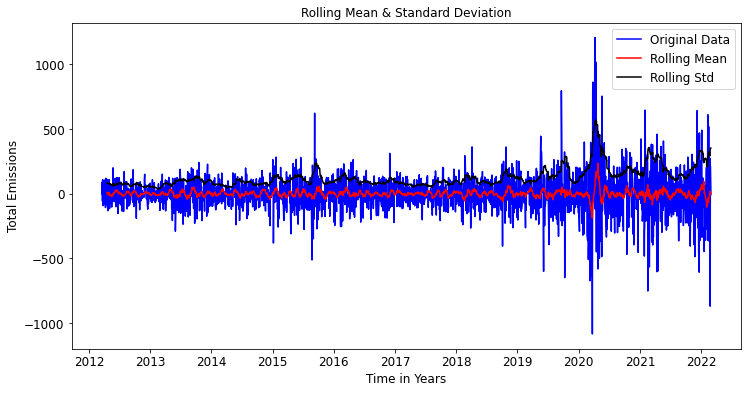

In [26]:
TestStationaryPlot(data_seasonal_first_difference)

#We are considering this seasonal first difference for further analysis because it looks more stationary

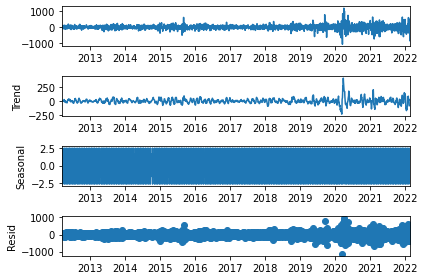

<Figure size 864x432 with 0 Axes>

In [27]:
#Time Series Decomposition Plot for data_seasonal_first_difference :

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decomposition = seasonal_decompose(data_seasonal_first_difference.dropna(),period=12)
ts_decomposition.plot()
plt.figure(figsize=(12,6))
plt.show()

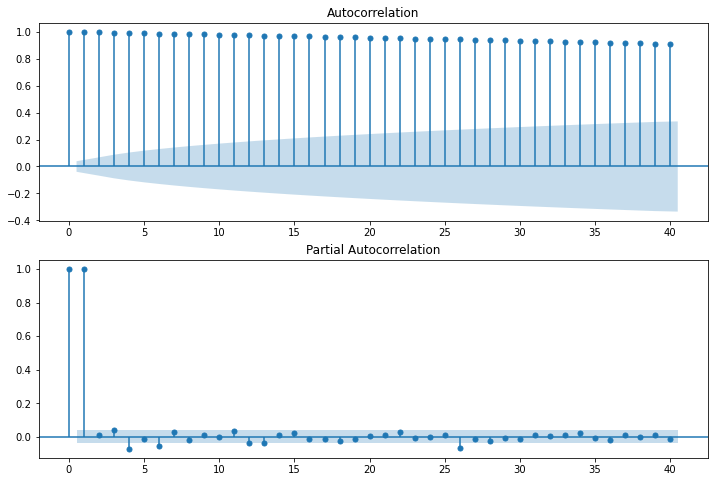

In [28]:
#ACF and PACF plot
#Non-Stationary Data

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["Close"],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["Close"],lags=40,ax=ax2)

In [29]:
# Correlation Matrix :
df.corr()

,Open,High,Low,Close,Volume,Turnover
Open,1.000000,0.999840,0.999773,0.999629,0.477334,0.707930
High,0.999840,1.000000,0.999689,0.999821,0.481548,0.711666
Low,0.999773,0.999689,1.000000,0.999805,0.471634,0.703408
Close,0.999629,0.999821,0.999805,1.000000,0.476548,0.707727
Volume,0.477334,0.481548,0.471634,0.476548,1.000000,0.869439
Turnover,0.707930,0.711666,0.703408,0.707727,0.869439,1.000000


## Data Pre-Processing :

In [30]:
# Normalizing dataset :

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from numpy import set_printoptions

In [31]:
# Non-Stationary Data :
scaler = MinMaxScaler(feature_range=(1,5))
df_scaled = scaler.fit_transform(np.array(df["Close"]).reshape(-1,1))

# Stationary Data :
scaler = MinMaxScaler(feature_range=(1,5))
df_seasonal_scaled = scaler.fit_transform(np.array(data_seasonal_first_difference.dropna()).reshape(-1,1))

In [32]:
# summarize transformed non-stationary data :

set_printoptions(precision=4)
print(df_scaled[:,:])

[[1.1478]
 [1.1536]
 [1.1536]
 ...
 [4.3464]
 [4.4667]
 [4.5065]]


In [33]:
# summarize transformed stationary data :

set_printoptions(precision=4)
print(df_seasonal_scaled[:,:])

[[2.8888]
 [3.0492]
 [2.7915]
 ...
 [1.3747]
 [3.2647]
 [2.8805]]


In [34]:
# Splitting the non-stationary dataset :

training_size = int(len(df_scaled)*0.70)
test_size = len(df_scaled) - training_size
train_data, test_data = df_scaled[0:training_size,:], df_scaled[training_size:len(df_scaled),:]

# Splitting the stationary dataset :

training_seasonal_size = int(len(df_seasonal_scaled)*0.70)
test_seasonal_size = len(df_seasonal_scaled) - training_seasonal_size
train_seasonal_data, test_seasonal_data = df_seasonal_scaled[0:training_seasonal_size,:], df_seasonal_scaled[training_seasonal_size:len(df_seasonal_scaled),:]

In [35]:
print([train_data])

[array([[1.1478],
       [1.1536],
       [1.1536],
       ...,
       [2.7464],
       [2.7724],
       [2.7592]])]


In [36]:
print([test_data])

[array([[2.7508],
       [2.7467],
       [2.7675],
       [2.8039],
       [2.8231],
       [2.8246],
       [2.8179],
       [2.8568],
       [2.8959],
       [2.9077],
       [2.9082],
       [2.9327],
       [2.9431],
       [2.9637],
       [2.9603],
       [2.9415],
       [2.9114],
       [2.9492],
       [2.938 ],
       [2.9747],
       [2.9905],
       [3.0038],
       [3.0167],
       [2.9964],
       [2.9829],
       [3.0028],
       [2.9848],
       [3.0046],
       [2.9789],
       [2.9825],
       [2.9962],
       [3.01  ],
       [3.0384],
       [3.0283],
       [2.9818],
       [2.9764],
       [3.0205],
       [2.9957],
       [3.0288],
       [3.0269],
       [3.0201],
       [3.0164],
       [2.983 ],
       [2.9535],
       [2.9129],
       [2.896 ],
       [2.8893],
       [2.851 ],
       [2.8727],
       [2.8536],
       [2.8829],
       [2.9269],
       [3.0504],
       [3.0155],
       [3.0239],
       [3.0002],
       [3.0551],
       [3.0787],
       [3.079

In [37]:
# Shape of Non-Stationary dataset :

print("Trained data shape : ", train_data.shape)
print("Test data shape : ", test_data.shape)

Trained data shape :  (1733, 1)
Test data shape :  (744, 1)


In [38]:
print(train_seasonal_data)

[[2.8888]
 [3.0492]
 [2.7915]
 ...
 [2.9675]
 [3.0819]
 [3.1916]]


In [39]:
print(test_seasonal_data)

[[3.0442]
 [3.0468]
 [2.916 ]
 [2.8946]
 [3.0295]
 [2.9595]
 [2.7401]
 [3.1162]
 [3.0037]
 [3.0393]
 [2.748 ]
 [2.5633]
 [2.598 ]
 [3.1082]
 [2.865 ]
 [2.8784]
 [2.7534]
 [2.9002]
 [2.9662]
 [2.6249]
 [2.7499]
 [2.888 ]
 [2.8044]
 [3.1218]
 [2.9181]
 [2.6882]
 [3.0403]
 [2.7555]
 [2.9668]
 [2.7528]
 [2.5383]
 [2.9806]
 [3.2346]
 [2.6258]
 [3.1964]
 [2.7627]
 [3.0041]
 [2.8484]
 [2.6111]
 [2.6346]
 [2.4809]
 [2.8512]
 [3.1285]
 [2.6959]
 [2.7585]
 [2.9256]
 [2.8696]
 [3.1654]
 [3.6685]
 [2.7056]
 [3.1414]
 [2.926 ]
 [3.4606]
 [3.1335]
 [2.9389]
 [3.0021]
 [2.911 ]
 [2.9652]
 [3.0066]
 [2.5129]
 [1.8454]
 [3.1471]
 [2.9325]
 [3.1081]
 [2.4613]
 [2.7647]
 [2.7264]
 [2.746 ]
 [2.7776]
 [2.9322]
 [2.8474]
 [2.8207]
 [3.16  ]
 [3.014 ]
 [2.8902]
 [2.8065]
 [2.9036]
 [3.0123]
 [3.1285]
 [3.1672]
 [2.9105]
 [2.6551]
 [2.2056]
 [3.0753]
 [2.835 ]
 [2.8695]
 [2.7495]
 [2.965 ]
 [3.1137]
 [2.8013]
 [2.6555]
 [2.5703]
 [2.7119]
 [3.1023]
 [3.2287]
 [2.8632]
 [3.0477]
 [2.579 ]
 [2.7637]
 [2.8862]


In [40]:
# Shape of Stationary dataset :

print("Trained data shape : ", train_seasonal_data.shape)
print("Test data shape : ", test_seasonal_data.shape)

Trained data shape :  (1724, 1)
Test data shape :  (740, 1)


Creating RMSE and MAPE Function :

In [41]:
#RMSE

def RMSE(org, pred):
    rmse_1=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse_1

In [42]:
#MAPE

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Model Evaluation :

### Forecasting - Data Driven Models : 

#### Simple Exponential Method : 

In [43]:
#Simple Exponential Method
#MAPE value
#RMSE value

from statsmodels.tsa.api import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train_data).fit(smoothing_level=0.8)
pred_ses = ses_model.predict(start = training_size, end = len(df_scaled))

MAPE_ses_model=MAPE(pred_ses, test_data) 
print("MAPE value of Simple Exponential Method :",MAPE_ses_model)

rmse_ses_model = RMSE(test_data, pred_ses)
print("RMSE value of Simple Exponential Method :",rmse_ses_model)

MAPE value of Simple Exponential Method : 20.150356454980273
RMSE value of Simple Exponential Method : 1.0489687084341996


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


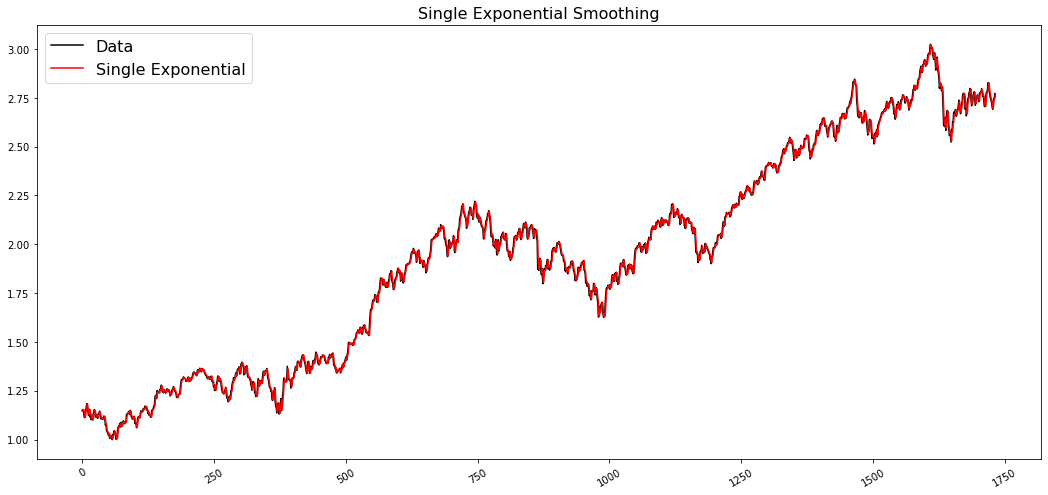

In [44]:
# Exponential Smoothing-Single:

data_SE = train_data

fit1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.8, optimized=False)

plt.figure(figsize=(18,8))

plt.plot(data_SE, color="black", label='Data') 

plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, color="red",label='Single Exponential')

plt.title('Single Exponential Smoothing', fontsize=16)

plt.legend(loc='upper left', fontsize=16)

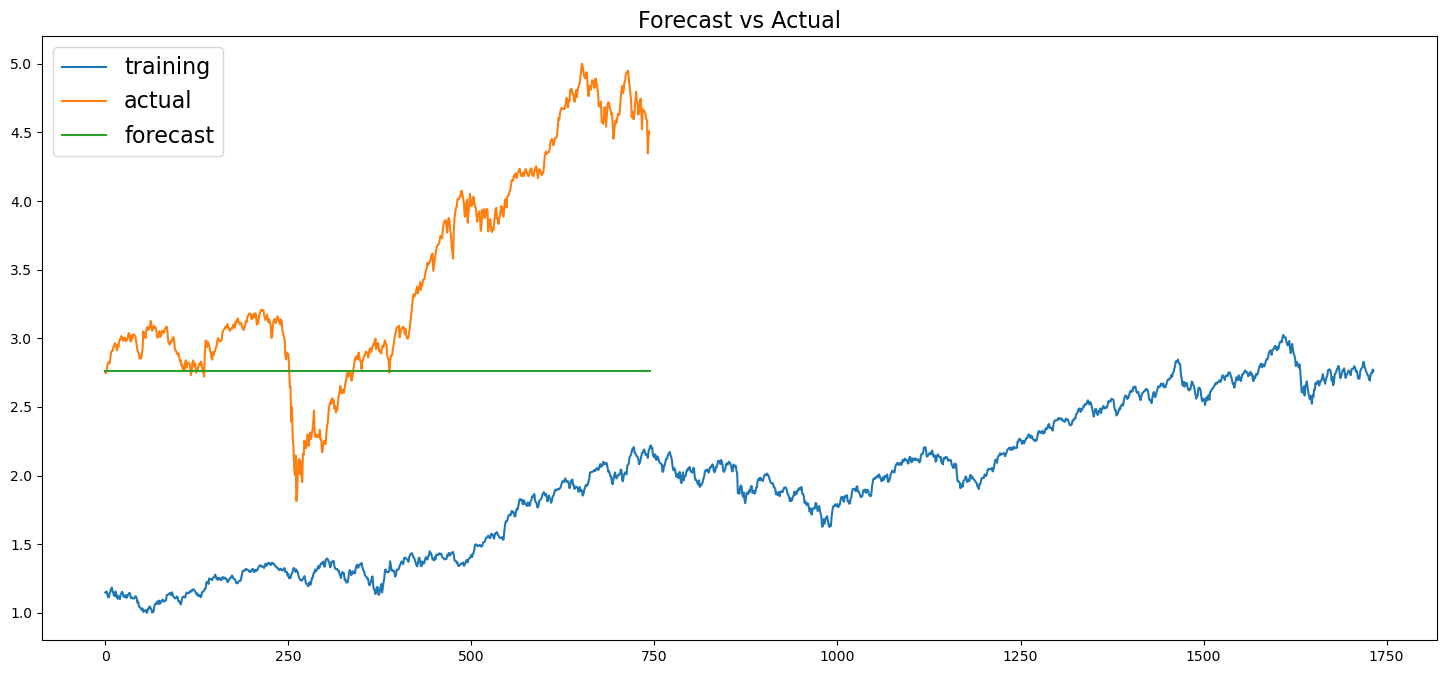

In [45]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actual', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

#### Holt's Method :

In [46]:
#Holt method
#MAPE value
#RMSE value

from statsmodels.tsa.api import Holt

hw_model = Holt(train_data).fit(smoothing_level=0.8, smoothing_slope=0.2)

pred_hw = hw_model.predict(start = training_size,end = len(df_scaled))

MAPE_hw_model= MAPE(pred_hw,test_data) 
print("MAPE value of Holt's Model :",MAPE_hw_model)

rmse_hw_model = RMSE(test_data,pred_hw)
print("RMSE value of Holt's Model :",rmse_hw_model)

MAPE value of Holt's Model : 35.61163371754338
RMSE value of Holt's Model : 1.3415999103316827


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-46-0b6283d1a6c4>:7: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(train_data).fit(smoothing_level=0.8, smoothing_slope=0.2)


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


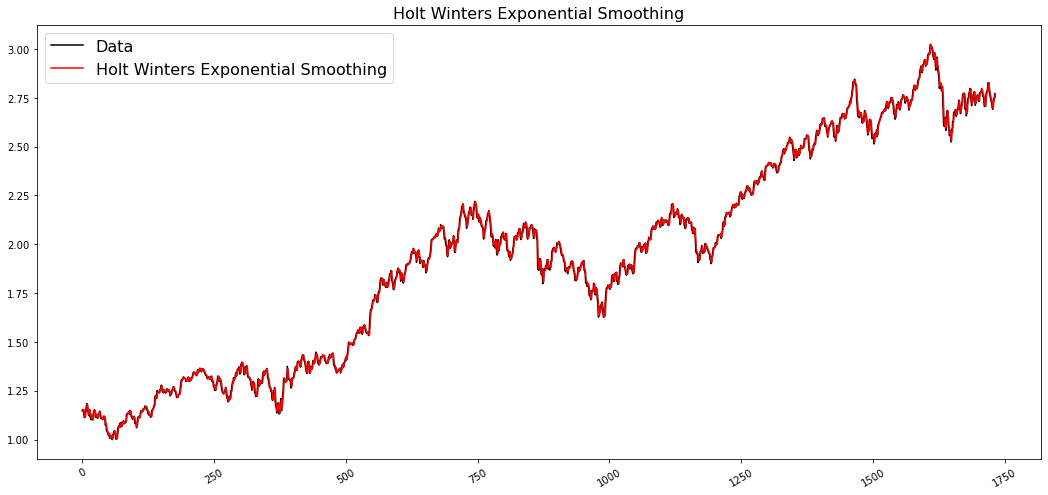

In [47]:
#Plot

data_SE = train_data

fit2 = Holt(train_data, exponential=True).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, color="black", label='Data') 

plt.xticks(rotation=30)

plt.plot(fit2.fittedvalues, color="red",label = "Holt Winters Exponential Smoothing")

plt.title('Holt Winters Exponential Smoothing', fontsize = 16)

plt.legend(loc='upper left', fontsize=16)

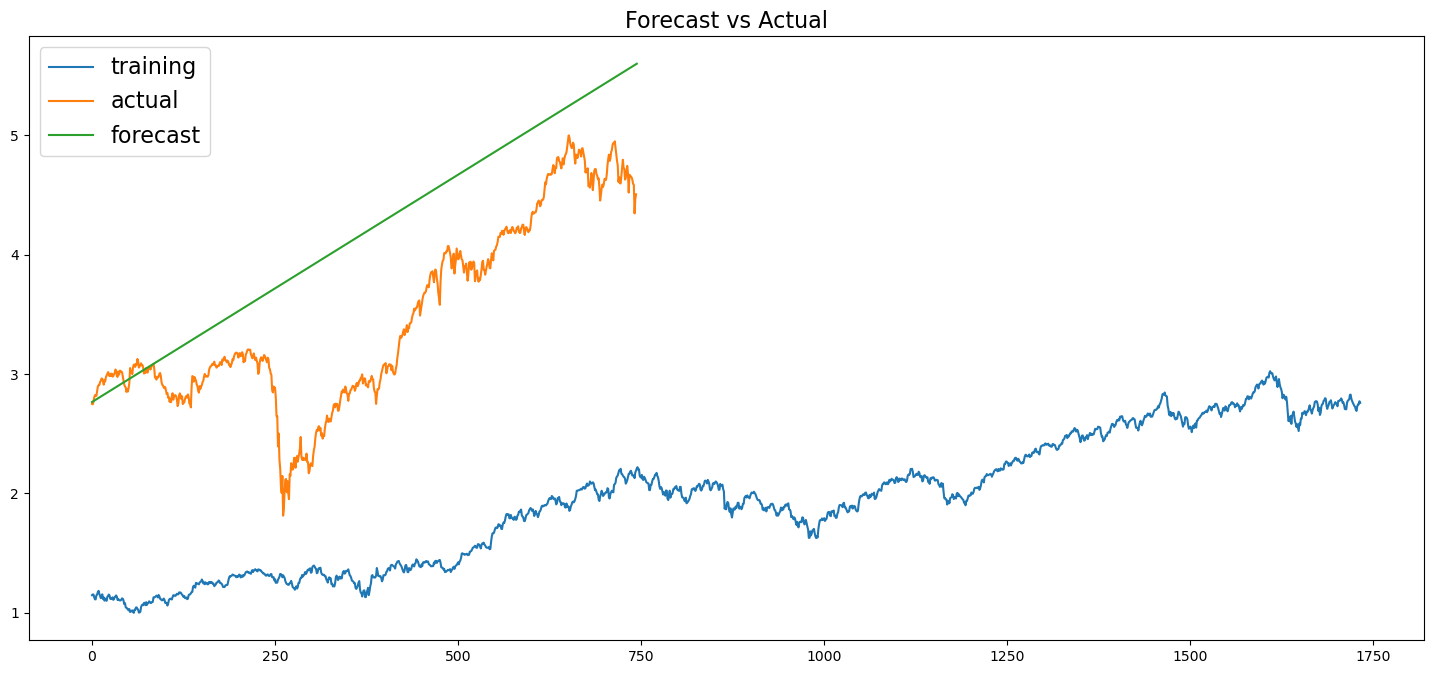

In [48]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Forecast vs Actual',fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

#### Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend : 

In [49]:
#Holts winter exponential smoothing with additive seasonality and additive trend
#MAPE value
#RMSE value

from statsmodels.tsa.api import ExponentialSmoothing

hwe_model_add_add = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit()

pred_hwe_add_add = hwe_model_add_add.predict(start = training_size,end = len(df_scaled))

MAPE_hwe_add_add_model=MAPE(pred_hwe_add_add,test_data)  
print("MAPE value of Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend :",MAPE_hwe_add_add_model)

rmse_hwe_add_add_model = RMSE(test_data, pred_hwe_add_add)
print("RMSE value of Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend :",rmse_hwe_add_add_model)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


MAPE value of Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend : 18.294427436022207
RMSE value of Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend : 0.8792718552978624


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


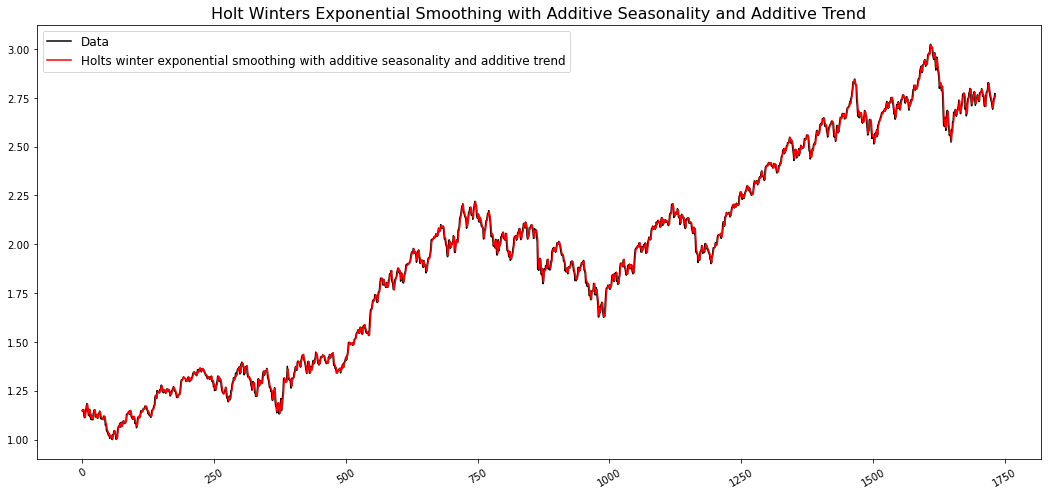

In [50]:
#Plot

data_SE = train_data

fit3 = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, color="black",label="Data")

plt.xticks(rotation=30)

plt.plot(fit3.fittedvalues, color="red",label="Holts winter exponential smoothing with additive seasonality and additive trend")

plt.title('Holt Winters Exponential Smoothing with Additive Seasonality and Additive Trend', fontsize=16)

plt.legend(loc='upper left', fontsize=12)

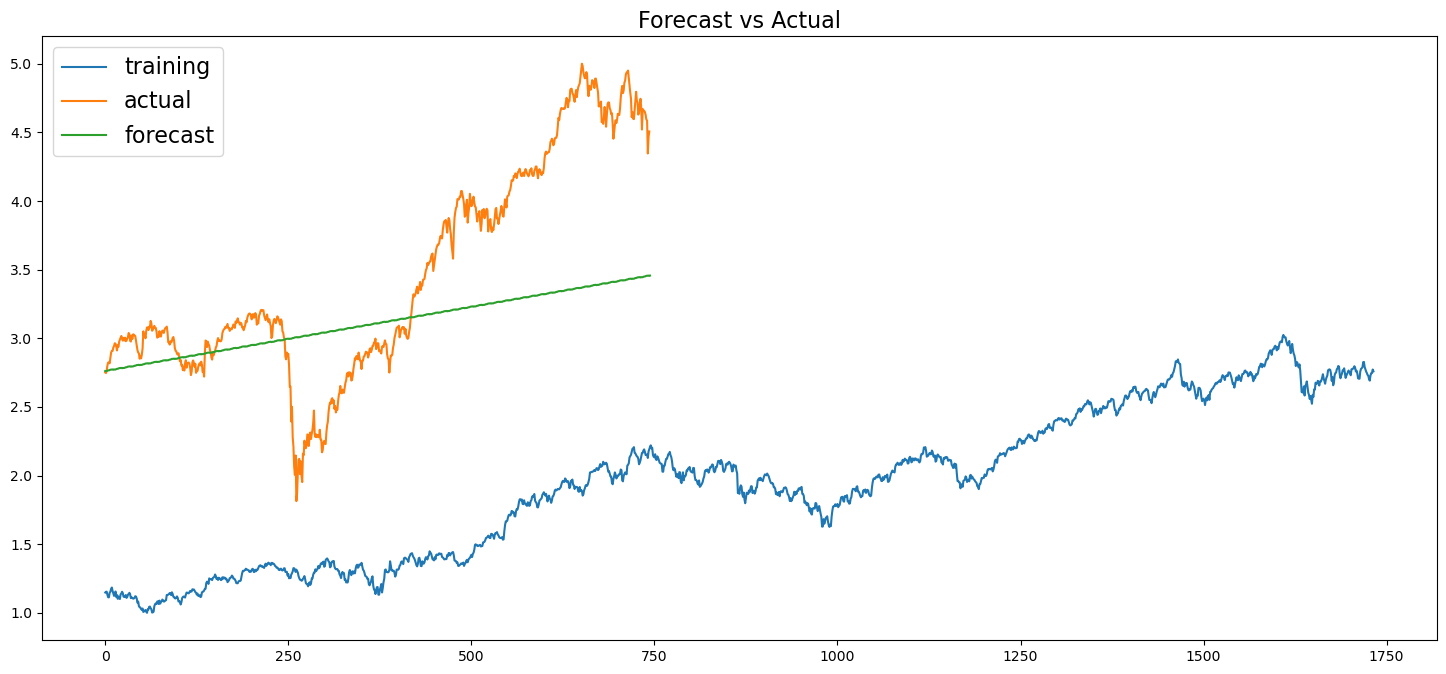

In [51]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actual',fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

#### Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend : 

In [52]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
#MAPE value
#RMSE value

from statsmodels.tsa.api import ExponentialSmoothing

hwe_model_mul_add = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit()

pred_hwe_mul_add = hwe_model_mul_add.predict(start = training_size,end = len(df_scaled))

MAPE_hwe_mul_add_model=MAPE(pred_hwe_mul_add,test_data)  
print("MAPE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend :",MAPE_hwe_mul_add_model)

rmse_hwe_mul_add_model = RMSE(test_data, pred_hwe_mul_add)
print("RMSE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend :",rmse_hwe_mul_add_model)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


MAPE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend : 18.29161920883991
RMSE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend : 0.8793622363538677


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


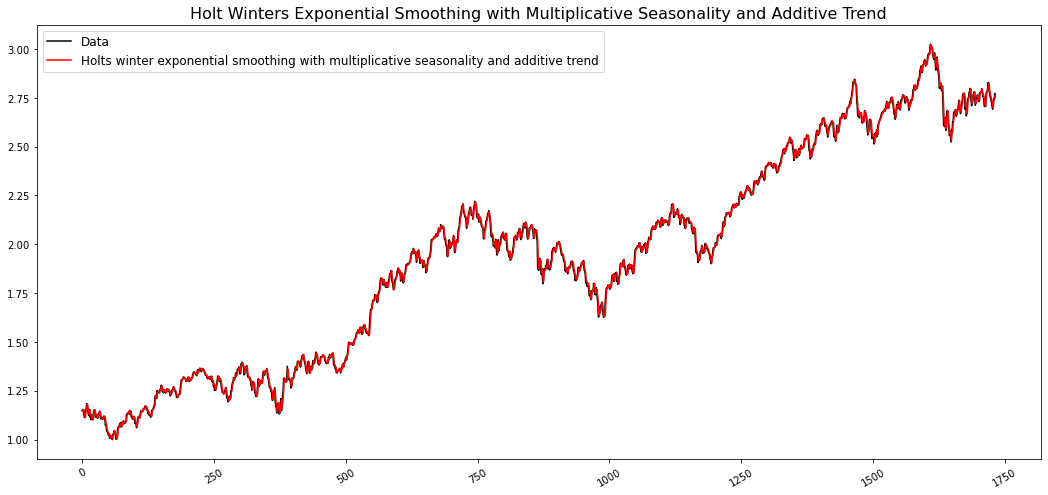

In [53]:
#Plot

data_SE = train_data

fit4 = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, color="black",label="Data")

plt.xticks(rotation=30)

plt.plot(fit4.fittedvalues, color="red",label="Holts winter exponential smoothing with multiplicative seasonality and additive trend")

plt.title('Holt Winters Exponential Smoothing with Multiplicative Seasonality and Additive Trend', fontsize=16)

plt.legend(loc='upper left', fontsize=12)

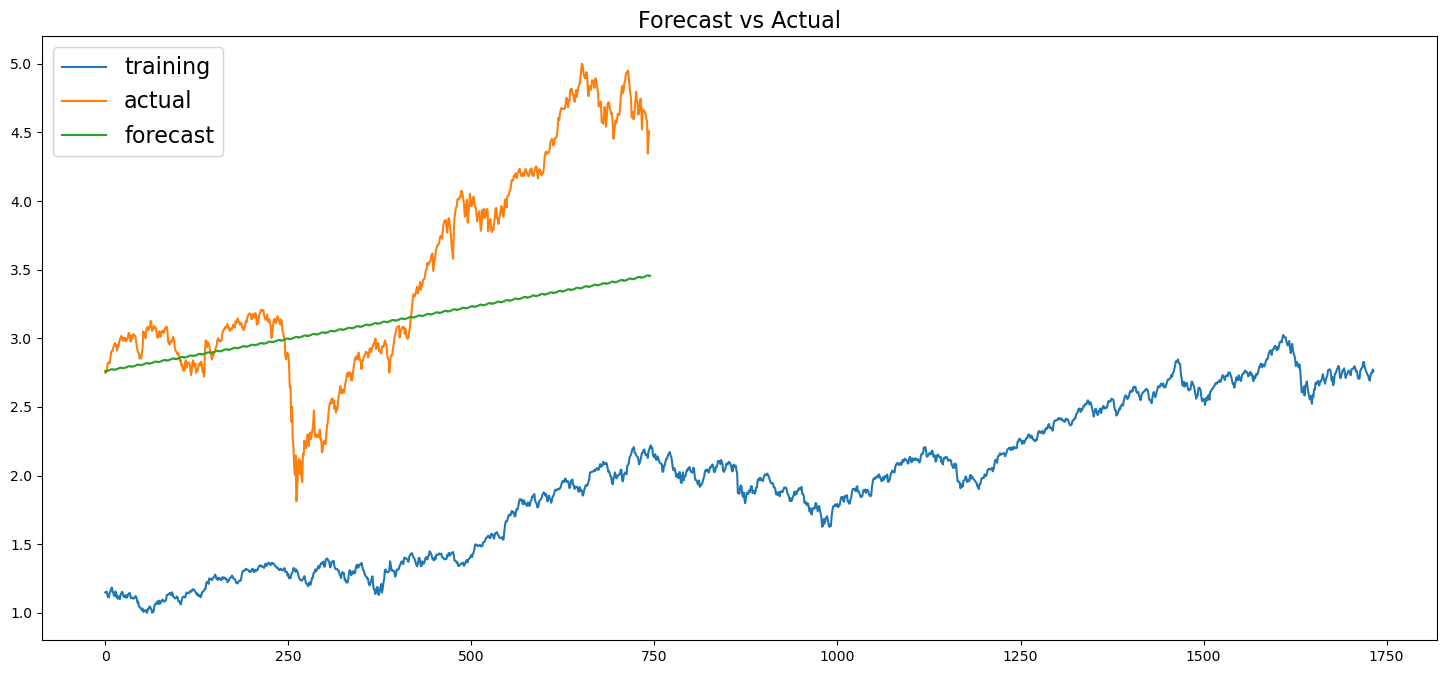

In [54]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actual',fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

#### Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend :

In [55]:
#Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend
#MAPE value
#RMSE value

from statsmodels.tsa.api import ExponentialSmoothing

hwe_model_mul_mul = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit()

pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = training_size,end = len(df_scaled))

MAPE_hwe_mul_mul_model=MAPE(pred_hwe_mul_mul,test_data)  
print("MAPE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend :",MAPE_hwe_mul_mul_model)

rmse_hwe_mul_mul_model = RMSE(test_data, pred_hwe_mul_mul)
print("RMSE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend :",rmse_hwe_mul_mul_model)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


MAPE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend : 19.165174282587866
RMSE value of Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend : 0.8631876703880172


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


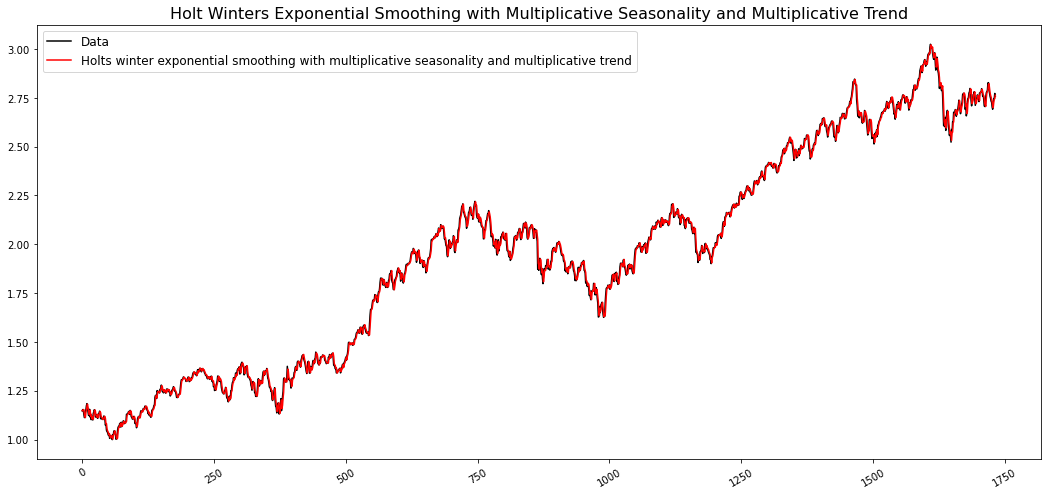

In [56]:
#Plot

data_SE = train_data

fit4 = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, color="black",label="Data")

plt.xticks(rotation=30)

plt.plot(fit4.fittedvalues, color="red",label="Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend")

plt.title('Holt Winters Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend', fontsize=16)

plt.legend(loc='upper left', fontsize=12)

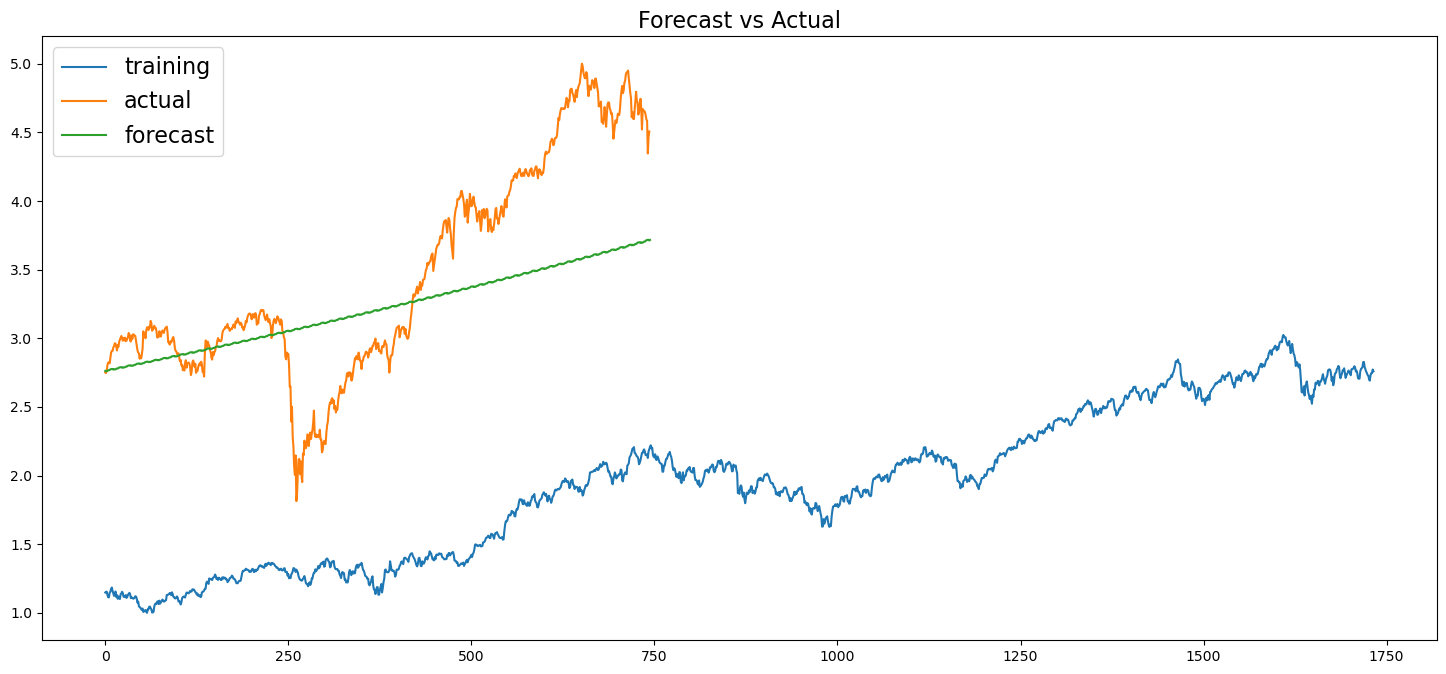

In [57]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actual',fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

### Forecasting - Model Based Methods : 

In [58]:
# Data preprocessing for models :
data_model = df[["Close"]].copy()
data_model.head()

,Close
Date,
2012-03-01,5339.75
2012-03-02,5359.35
2012-03-03,5359.40
2012-03-05,5280.35
2012-03-06,5222.40


In [59]:
data_model["t"] = np.arange(1,2478)
data_model["t_squared"]=data_model["t"]*data_model["t"]
data_model["lg_Close"]= np.log(data_model["Close"])
data_model.tail()

,Close,t,t_squared,lg_Close
Date,,,,
2022-02-22,17092.20,2473,6115729,9.746377
2022-02-23,17063.25,2474,6120676,9.744682
2022-02-24,16247.95,2475,6125625,9.695722
2022-02-25,16658.40,2476,6130576,9.720670
2022-02-28,16793.90,2477,6135529,9.728771


In [60]:
#Splitting data into Train and Test
train_model = data_model[["Close","t","t_squared","lg_Close"]].head(1733)
test_model = data_model[["Close","t","t_squared","lg_Close"]].tail(744)

In [61]:
train_model.head()

,Close,t,t_squared,lg_Close
Date,,,,
2012-03-01,5339.75,1,1,8.582934
2012-03-02,5359.35,2,4,8.586598
2012-03-03,5359.40,3,9,8.586607
2012-03-05,5280.35,4,16,8.571748
2012-03-06,5222.40,5,25,8.560712


In [62]:
test_model.head()

,Close,t,t_squared,lg_Close
Date,,,,
2019-02-27,10806.65,1734,3006756,9.287917
2019-02-28,10792.50,1735,3010225,9.286607
2019-03-01,10863.50,1736,3013696,9.293164
2019-03-05,10987.45,1737,3017169,9.304509
2019-03-06,11053.00,1738,3020644,9.310457


In [63]:
print("Train model data shape :",train_model.shape)
print("Test model data shape :",test_model.shape)

Train model data shape : (1733, 4)
Test model data shape : (744, 4)


#### Linear Model : 

In [64]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Close~t',data=train_model).fit()

pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test_model['t'])))


MAPE_linear_model = MAPE(pred_linear,test_model["Close"])
print("MAPE value of Linear Model :",MAPE_linear_model)

rmse_linear_model = RMSE(test_model["Close"],pred_linear)
print("RMSE value of Linear Model :",rmse_linear_model)

MAPE value of Linear Model : 12.506994909501946
RMSE value of Linear Model : 2243.450579344646


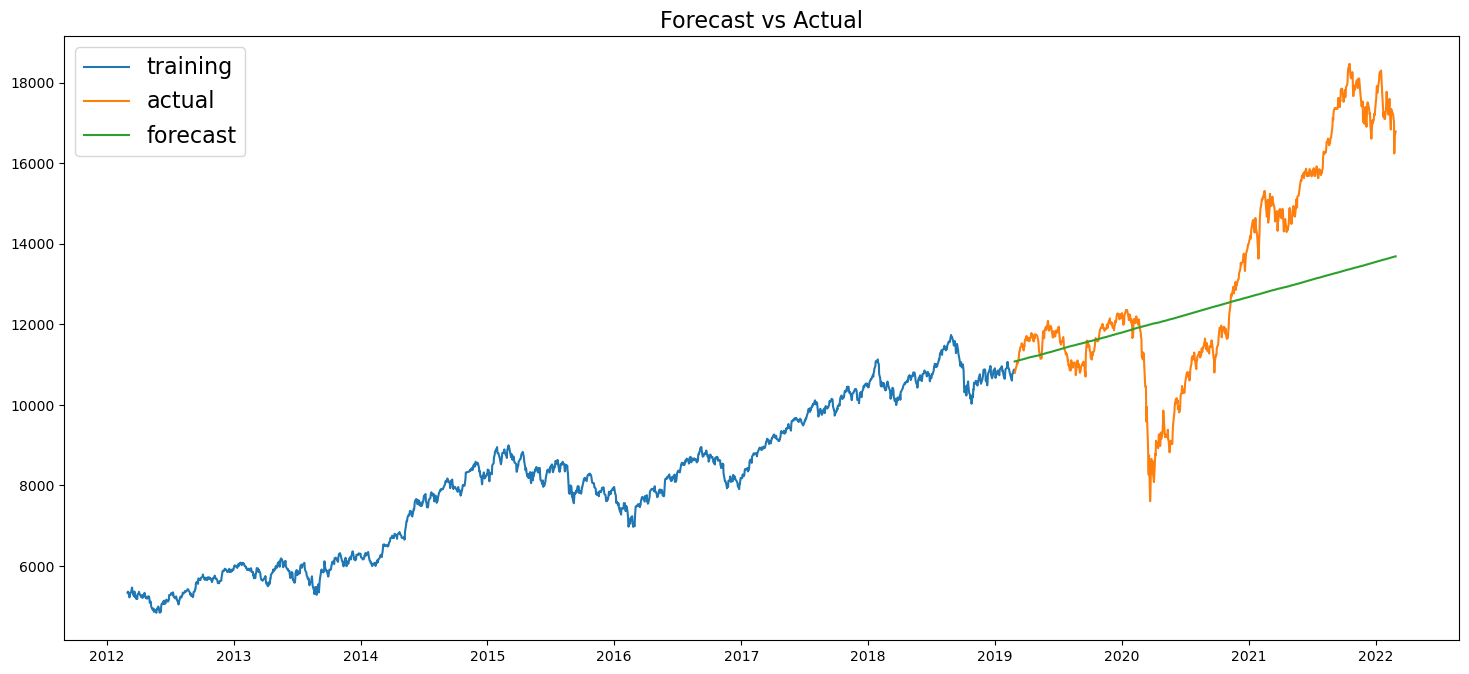

In [65]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_model["Close"], label='training')
plt.plot(test_model["Close"], label='actual')
plt.plot(pred_linear, label='forecast')
plt.title('Forecast vs Actual',fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [66]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.881e+04
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:37:28   Log-Likelihood:                -13341.
No. Observations:                1733   AIC:                         2.669e+04
Df Residuals:                    1731   BIC:                         2.670e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4984.8906     25.653    194.323      0.000    4934.577    5035.204
t              3.5149      0.026    137.153      0.000       3.465       3.565
==============================================================================
Omnibus:                        4.935   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.895
Skew:                           0.109   Prob(JB):                       0.0865
Kurtosis:                       2.858   Cond. No.                     2.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Exponential Model :

In [67]:
import statsmodels.formula.api as smf

Exp = smf.ols('lg_Close~t',data=train_model).fit()

pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_model['t'])))

MAPE_Exp_model = MAPE(np.exp(pred_Exp),test_model['Close'])
print("MAPE value of Exponential Model :",MAPE_Exp_model)

rmse_Exp_model = RMSE(test_model['Close'],np.exp(pred_Exp))
print("RMSE value of Exponential Model :",rmse_Exp_model)

MAPE value of Exponential Model : 11.324754388321267
RMSE value of Exponential Model : 1763.7769088038342


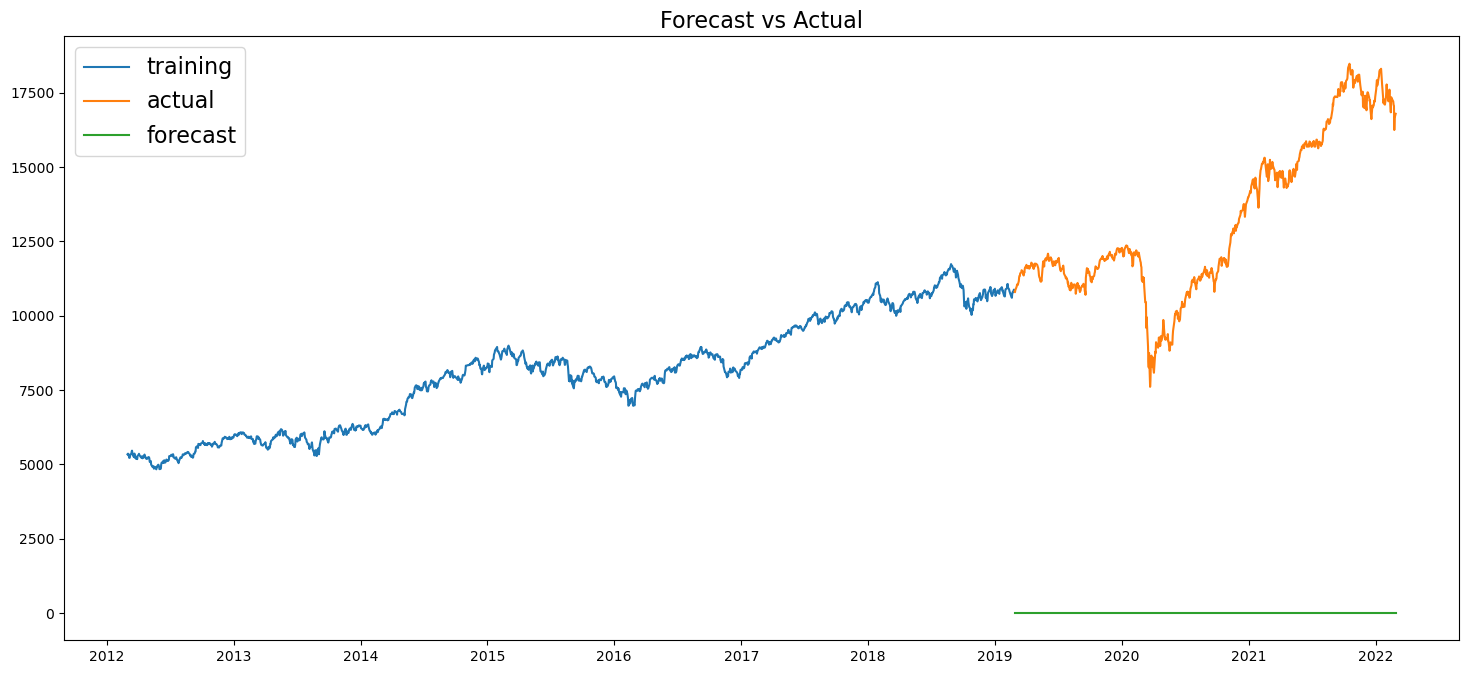

In [68]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_model["Close"], label='training')
plt.plot(test_model["Close"], label='actual')
plt.plot(pred_Exp, label='forecast')
plt.title('Forecast vs Actual', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [69]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lg_Close   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.757e+04
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:37:31   Log-Likelihood:                 2128.6
No. Observations:                1733   AIC:                            -4253.
Df Residuals:                    1731   BIC:                            -4242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5727      0.003   2516.031      0.000       8.566       8.579
t              0.0005    3.4e-06    132.552      0.000       0.000       0.000
==============================================================================
Omnibus:                       88.140   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.000
Skew:                           0.590   Prob(JB):                     1.17e-22
Kurtosis:                       3.074   Cond. No.                     2.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Quadratic Model : 

In [70]:
import statsmodels.formula.api as smf

Quad = smf.ols('Close~t+t_squared',data=train_model).fit()

pred_Quad = pd.Series(Quad.predict(test_model[["t","t_squared"]]))

MAPE_Quad_model = MAPE( pred_Quad,test_model['Close'])
print("MAPE value of Quadratic Model :",MAPE_Quad_model)

rmse_Quad_model = RMSE(test_model['Close'], pred_Quad)
print("RMSE value of Quadratic Model :",rmse_Quad_model)

MAPE value of Quadratic Model : 12.178461521729636
RMSE value of Quadratic Model : 2153.4181135539498


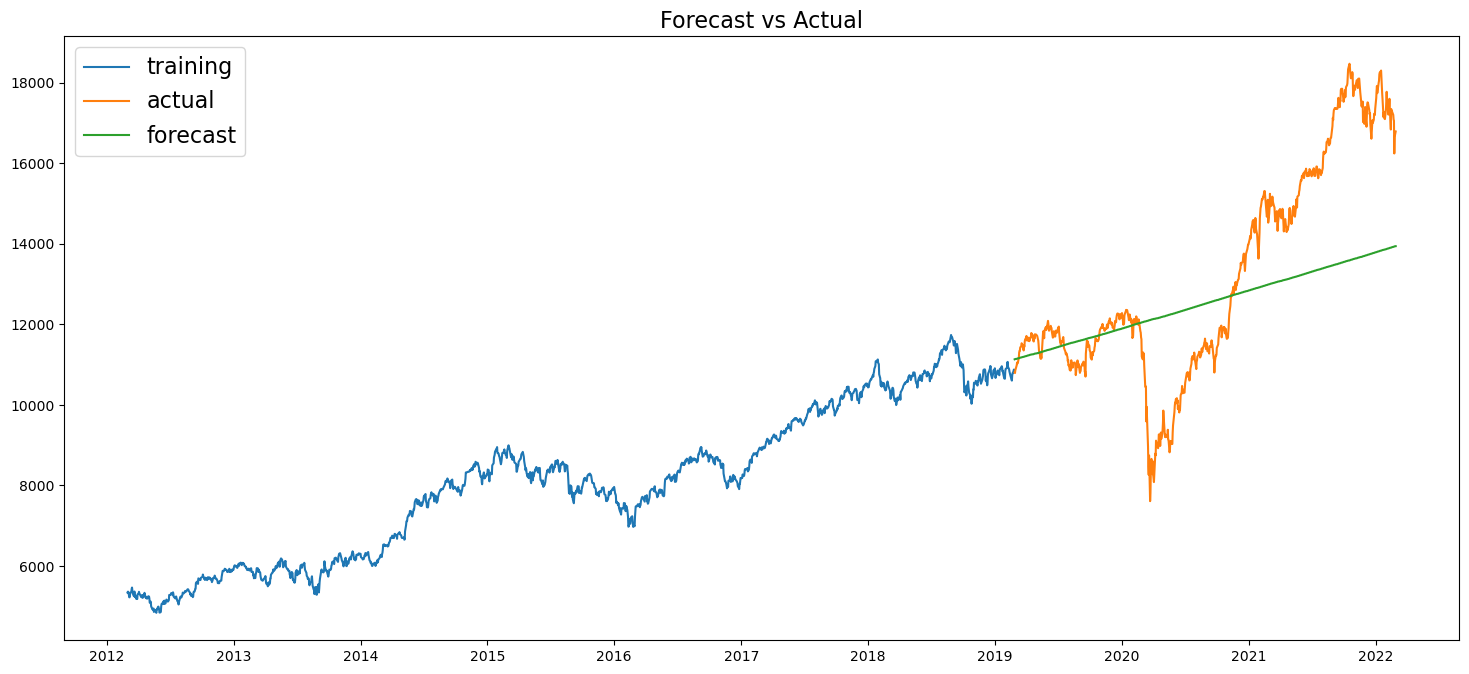

In [71]:
# Plot
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_model["Close"], label='training')
plt.plot(test_model["Close"], label='actual')
plt.plot(pred_Quad, label='forecast')
plt.title('Forecast vs Actual', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [72]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     9421.
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:38:02   Log-Likelihood:                -13339.
No. Observations:                1733   AIC:                         2.668e+04
Df Residuals:                    1730   BIC:                         2.670e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5039.0831     38.478    130.959      0.000    4963.614    5114.552
t              3.3275      0.102     32.467      0.000       3.126       3.528
t_squared      0.0001   5.72e-05      1.888      0.059   -4.17e-06       0.000
==============================================================================
Omnibus:                       11.003   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.118
Skew:                           0.187   Prob(JB):                      0.00385
Kurtosis:                       2.879   Cond. No.                     4.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model - ARIMA , Auto-Regressor , Moving Average :

#### ARIMA Model (Non-Stationary dataset) :

In [73]:
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [74]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [75]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [125]:
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=1.495
ARIMA(0, 0, 1) RMSE=0.760
ARIMA(0, 0, 2) RMSE=0.448
ARIMA(0, 1, 0) RMSE=0.048
ARIMA(0, 1, 1) RMSE=0.048
ARIMA(0, 1, 2) RMSE=0.048
ARIMA(0, 2, 0) RMSE=0.068
ARIMA(0, 2, 1) RMSE=0.048
ARIMA(0, 2, 2) RMSE=0.048
ARIMA(1, 0, 0) RMSE=0.048
ARIMA(1, 0, 1) RMSE=0.048
ARIMA(1, 0, 2) RMSE=0.048
ARIMA(1, 1, 0) RMSE=0.048
ARIMA(1, 1, 1) RMSE=0.048
ARIMA(1, 1, 2) RMSE=0.048
ARIMA(1, 2, 0) RMSE=0.059
ARIMA(1, 2, 1) RMSE=0.048
ARIMA(1, 2, 2) RMSE=0.048
ARIMA(2, 0, 0) RMSE=0.048
ARIMA(2, 0, 1) RMSE=0.048
ARIMA(2, 0, 2) RMSE=0.048
ARIMA(2, 1, 0) RMSE=0.048
ARIMA(2, 1, 1) RMSE=0.048
ARIMA(2, 1, 2) RMSE=0.048
ARIMA(2, 2, 0) RMSE=0.056
ARIMA(2, 2, 1) RMSE=0.048
ARIMA(2, 2, 2) RMSE=0.048
Best ARIMA(0, 1, 0) RMSE=0.048


In [76]:
#0,1,0
model_arima = ARIMA(train_data,order = (0,1,0))
model_arima = model_arima.fit()
model_arima.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1733
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4284.622
Date:                Fri, 25 Mar 2022   AIC                          -8567.244
Time:                        14:38:14   BIC                          -8561.787
Sample:                             0   HQIC                         -8565.226
                               - 1733                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   9.74e-06     42.676      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                  10.62   Jarque-Bera (JB):               426.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
### make prediction on test set
start = len(train_data)
end = len(train_data)+len(test_data)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

[2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592 2.7592
 2.759

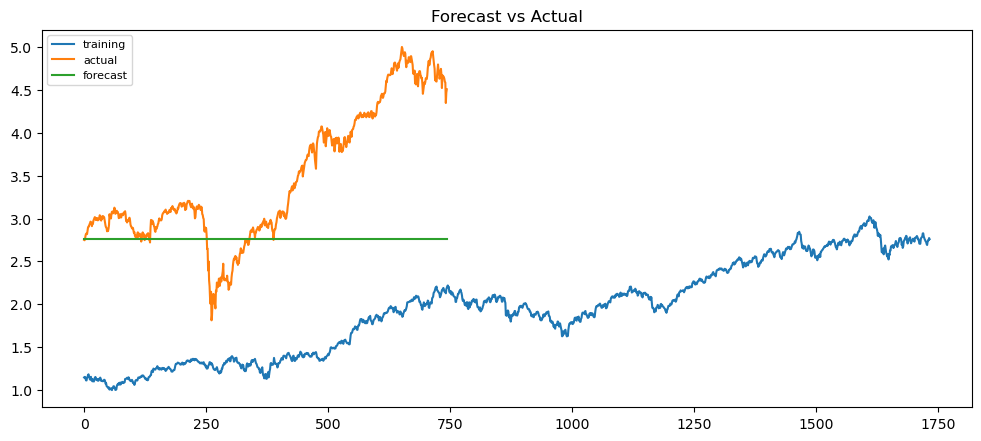

In [78]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_arima, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [79]:
RMSE_ARIMA_NS = RMSE(test_data,pred_arima)
print("RMSE Value of ARIMA Model :",RMSE_ARIMA_NS)

MAPE_ARIMA_NS = MAPE(pred_arima, test_data)
print("MAPE Value of ARIMA Model :",MAPE_ARIMA_NS)

RMSE Value of ARIMA Model : 1.0500046971101
MAPE Value of ARIMA Model : 20.180826244653005


#### Auto-Regressor Model :

In [163]:
model_ar = AutoReg(train_seasonal_data,lags = 6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1724
Model:                     AutoReg(6)   Log Likelihood                 629.861
Method:               Conditional MLE   S.D. of innovations              0.168
Date:                Fri, 25 Mar 2022   AIC                             -3.562
Time:                        19:56:36   BIC                             -3.536
Sample:                             6   HQIC                            -3.552
                                 1724                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8614      0.163     17.568      0.000       2.542       3.181
y.L1           0.1065      0.024      4.412      0.000       0.059       0.154
y.L2          -0.0600      0.024     -2.472      0.0

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [164]:
### make prediction on test set
start = len(train_seasonal_data)
end = len(train_seasonal_data)+len(test_seasonal_data)-1
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

[2.9075 2.8748 2.8899 2.884  2.8802 2.8859 2.8923 2.8929 2.8925 2.8927
 2.8926 2.8923 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922 2.8922
 2.892

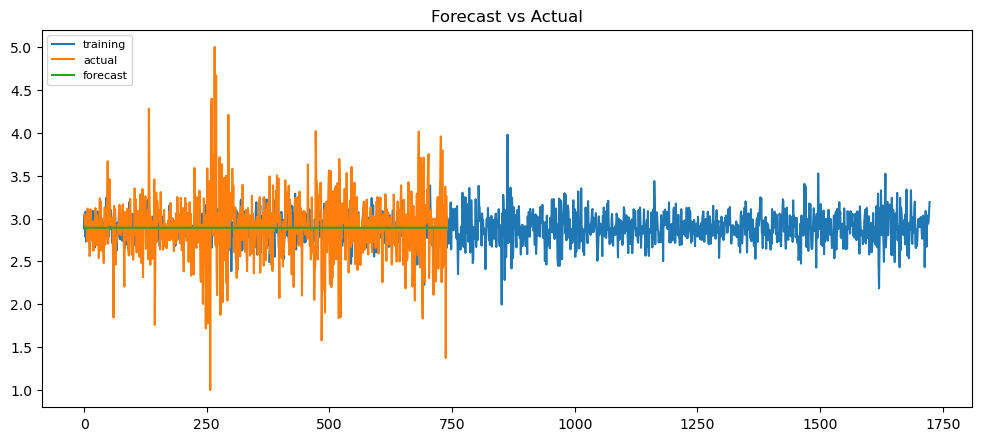

In [165]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_seasonal_data, label='training')
plt.plot(test_seasonal_data, label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [166]:
RMSE_AR = RMSE(test_seasonal_data,pred_ar)
print("RMSE Value of AR Model :",RMSE_AR)

MAPE_AR = MAPE(pred_ar, test_seasonal_data)
print("MAPE Value of AR Model :",MAPE_AR)

RMSE Value of AR Model : 0.38340532922534576
MAPE Value of AR Model : 10.134012365979931


#### Moving Average Model : 

In [167]:
#(0,1,0)
model_ma = ARIMA(train_seasonal_data,order = (0,1,0))
model_ma = model_ma.fit()
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1724
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 113.018
Date:                Fri, 25 Mar 2022   AIC                           -224.036
Time:                        20:06:54   BIC                           -218.584
Sample:                             0   HQIC                          -222.019
                               - 1724                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0514      0.001     36.235      0.000       0.049       0.054
===================================================================================
Ljung-Box (L1) (Q):                 303.62   Jarque-Bera (JB):                78.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
### make prediction on test set
start = len(train_seasonal_data)
end = len(train_seasonal_data)+len(test_seasonal_data)-1
pred_ma = model_ma.predict(start=start,end=end)
print(pred_ma)

[3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.191

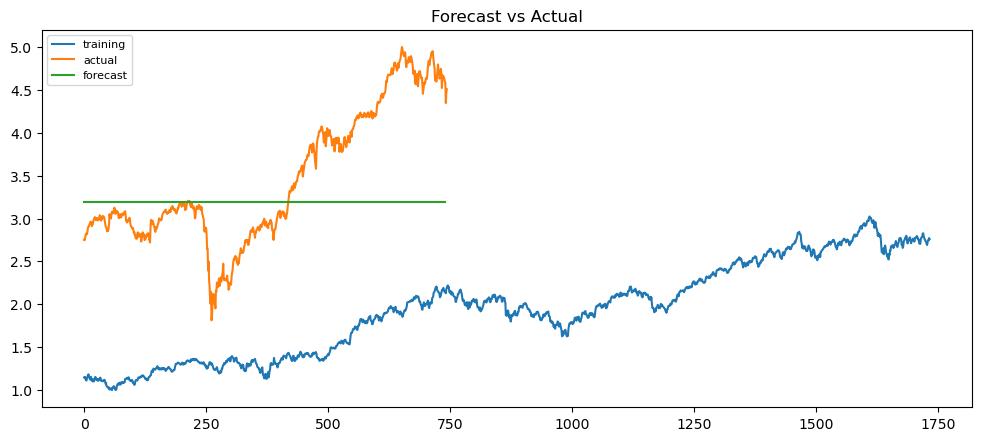

In [169]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(pred_ma, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [170]:
RMSE_MA = RMSE(test_seasonal_data,pred_ma)
print("RMSE Value of AR Model :",RMSE_MA)

MAPE_MA = MAPE(pred_ma, test_seasonal_data)
print("MAPE Value of AR Model :",MAPE_MA)

RMSE Value of AR Model : 0.4881737366043122
MAPE Value of AR Model : 14.819622414836665


#### ARIMA Model (Stationary dataset) : 

In [88]:
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [89]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [90]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [155]:
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.495
ARIMA(0, 0, 1) RMSE=0.760
ARIMA(0, 0, 2) RMSE=0.448
ARIMA(0, 1, 0) RMSE=0.048
ARIMA(0, 1, 1) RMSE=0.048
ARIMA(0, 1, 2) RMSE=0.048
ARIMA(0, 2, 0) RMSE=0.068
ARIMA(0, 2, 1) RMSE=0.048
ARIMA(0, 2, 2) RMSE=0.048
ARIMA(1, 0, 0) RMSE=0.048
ARIMA(1, 0, 1) RMSE=0.048
ARIMA(1, 0, 2) RMSE=0.048
ARIMA(1, 1, 0) RMSE=0.048
ARIMA(1, 1, 1) RMSE=0.048
ARIMA(1, 1, 2) RMSE=0.048
ARIMA(1, 2, 0) RMSE=0.059
ARIMA(1, 2, 1) RMSE=0.048
ARIMA(1, 2, 2) RMSE=0.048
ARIMA(2, 0, 0) RMSE=0.048
ARIMA(2, 0, 1) RMSE=0.048
ARIMA(2, 0, 2) RMSE=0.048
ARIMA(2, 1, 0) RMSE=0.048
ARIMA(2, 1, 1) RMSE=0.048
ARIMA(2, 1, 2) RMSE=0.048
ARIMA(2, 2, 0) RMSE=0.056
ARIMA(2, 2, 1) RMSE=0.048
ARIMA(2, 2, 2) RMSE=0.048
Best ARIMA(0, 1, 0) RMSE=0.048


In [91]:
#0,1,0
model_arima = ARIMA(train_seasonal_data,order = (0,1,0))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1724
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 113.018
Date:                Fri, 25 Mar 2022   AIC                           -224.036
Time:                        14:38:36   BIC                           -218.584
Sample:                             0   HQIC                          -222.019
                               - 1724                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0514      0.001     36.235      0.000       0.049       0.054
===================================================================================
Ljung-Box (L1) (Q):                 303.62   Jarque-Bera (JB):                78.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
### make prediction on test set
start = len(train_seasonal_data)
end = len(train_seasonal_data)+len(test_seasonal_data)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

[3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916 3.1916
 3.191

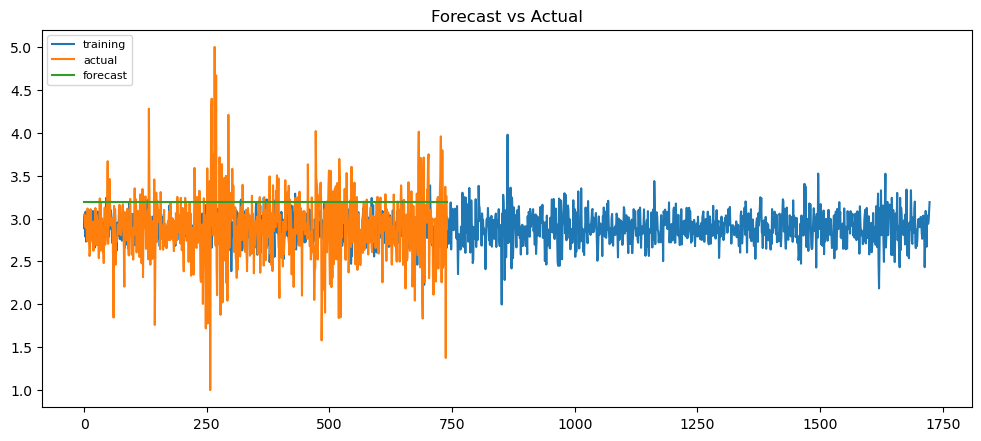

In [93]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_seasonal_data, label='training')
plt.plot(test_seasonal_data, label='actual')
plt.plot(pred_arima, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [94]:
RMSE_ARIMA_S = RMSE(test_seasonal_data,pred_arima)
print("RMSE Value of ARIMA Model :",RMSE_ARIMA_S)

MAPE_ARIMA_S = MAPE(pred_arima, test_seasonal_data)
print("MAPE Value of ARIMA Model :",MAPE_ARIMA_S)

RMSE Value of ARIMA Model : 0.4881737366043122
MAPE Value of ARIMA Model : 14.819622414836665


#### LSTM Model :

In [95]:
df = pd.read_csv("NSE_Extracted_data.csv", header=0, index_col=0, parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Turnover,Index_Name
Date,,,,,,,
2012-03-01,5366.00,5372.45,5297.50,5339.75,196867905,6.847630e+10,NIFTY 50
2012-03-02,5369.45,5392.55,5315.05,5359.35,185021526,6.768520e+10,NIFTY 50
2012-03-03,5360.05,5369.60,5353.40,5359.40,16770991,4.293500e+09,NIFTY 50
2012-03-05,5342.55,5344.50,5265.70,5280.35,196421155,6.036630e+10,NIFTY 50
2012-03-06,5266.00,5382.05,5206.40,5222.40,290396014,9.319010e+10,NIFTY 50


In [96]:
df.drop(["High","Low","Open","Volume","Turnover","Index_Name"],axis=1,inplace=True)
df.head()

,Close
Date,
2012-03-01,5339.75
2012-03-02,5359.35
2012-03-03,5359.40
2012-03-05,5280.35
2012-03-06,5222.40


In [97]:
df.shape

(2477, 1)

In [98]:
# Splitting the dataset :

data_training = pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1733, 1)
(744, 1)


In [99]:
# Normalizing dataset :

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [100]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.073 ],
       [0.0759],
       [0.0759],
       ...,
       [0.8628],
       [0.8756],
       [0.8692]])

In [101]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [102]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [103]:
model = Sequential()
model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = "relu", return_sequences = True))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [104]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 24s 327ms/step - loss: 0.1057
Epoch 2/50
52/52 [==============================] - 18s 352ms/step - loss: 0.0741
Epoch 3/50
52/52 [==============================] - 18s 350ms/step - loss: 0.0726
Epoch 4/50
52/52 [==============================] - 19s 357ms/step - loss: 0.0716
Epoch 5/50
52/52 [==============================] - 19s 365ms/step - loss: 0.0719
Epoch 6/50
52/52 [==============================] - 18s 350ms/step - loss: 0.0694
Epoch 7/50
52/52 [==============================] - 18s 349ms/step - loss: 0.0691
Epoch 8/50
52/52 [==============================] - 19s 356ms/step - loss: 0.0686
Epoch 9/50
52/52 [==============================] - 18s 350ms/step - loss: 0.0685
Epoch 10/50
52/52 [==============================] - 18s 349ms/step - loss: 0.0682
Epoch 11/50
52/52 [==============================] - 18s 355ms/step - loss: 0.0677
Epoch 12/50
52/52 [==============================] - 19s 366ms/step - loss: 0.0678
Epoch 13/50
5

In [105]:
data_testing.head()

,Close
Date,
2019-02-27,10806.65
2019-02-28,10792.50
2019-03-01,10863.50
2019-03-05,10987.45
2019-03-06,11053.00


In [106]:
past_100_days = data_training.tail(100)

In [107]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [108]:
final_df.head()

,Close
0,10599.25
1,10316.45
2,10348.05
3,10301.05
4,10460.10


In [109]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.2751],
       [0.249 ],
       [0.2519],
       [0.2476],
       [0.2623],
       [0.2415],
       [0.2634],
       [0.2671],
       [0.2737],
       [0.2616],
       [0.2478],
       [0.2425],
       [0.2334],
       [0.2406],
       [0.2314],
       [0.2227],
       [0.243 ],
       [0.2382],
       [0.2555],
       [0.2549],
       [0.2708],
       [0.2681],
       [0.2687],
       [0.275 ],
       [0.2738],
       [0.2643],
       [0.2735],
       [0.2729],
       [0.2767],
       [0.2827],
       [0.2902],
       [0.2803],
       [0.2751],
       [0.2684],
       [0.2778],
       [0.283 ],
       [0.287 ],
       [0.2989],
       [0.3006],
       [0.3012],
       [0.2999],
       [0.292 ],
       [0.2752],
       [0.2837],
       [0.2649],
       [0.2704],
       [0.2878],
       [0.2928],
       [0.294 ],
       [0.3017],
       [0.3035],
       [0.3089],
       [0.3075],
       [0.2893],
       [0.281 ],
       [0.2871],
       [0.2917],
       [0.299 ],
       [0.2993

In [110]:
input_data.shape

(844, 1)

In [111]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]) :
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [112]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(744, 100, 1)
(744,)


In [113]:
# Making Predictions :

y_predicted = model.predict(x_test)

In [114]:
y_predicted.shape

(744, 100, 1)

In [115]:
y_test

array([0.2941, 0.2928, 0.2994, 0.3108, 0.3168, 0.3173, 0.3152, 0.3274,
       0.3397, 0.3434, 0.3435, 0.3512, 0.3545, 0.3609, 0.3599, 0.354 ,
       0.3445, 0.3564, 0.3529, 0.3644, 0.3693, 0.3735, 0.3776, 0.3712,
       0.367 , 0.3732, 0.3676, 0.3738, 0.3657, 0.3668, 0.3711, 0.3755,
       0.3844, 0.3812, 0.3666, 0.3649, 0.3788, 0.371 , 0.3814, 0.3808,
       0.3786, 0.3775, 0.367 , 0.3578, 0.345 , 0.3397, 0.3376, 0.3256,
       0.3324, 0.3264, 0.3356, 0.3494, 0.3882, 0.3772, 0.3798, 0.3724,
       0.3896, 0.397 , 0.3974, 0.3912, 0.399 , 0.3969, 0.4121, 0.406 ,
       0.3896, 0.3921, 0.3968, 0.4008, 0.3953, 0.3961, 0.3877, 0.3738,
       0.3756, 0.3756, 0.3885, 0.3786, 0.3763, 0.3852, 0.3899, 0.3894,
       0.3845, 0.3916, 0.3957, 0.3963, 0.3991, 0.3866, 0.3633, 0.3631,
       0.3578, 0.3656, 0.3628, 0.3661, 0.3729, 0.3752, 0.3669, 0.3505,
       0.3438, 0.3424, 0.3369, 0.3351, 0.3381, 0.3293, 0.3198, 0.3228,
       0.3101, 0.3117, 0.2993, 0.3072, 0.2986, 0.3149, 0.322 , 0.3051,
      

In [116]:
y_predicted

array([[[0.4476],
        [0.4851],
        [0.4905],
        ...,
        [0.4745],
        [0.4745],
        [0.4745]],

       [[0.4475],
        [0.4849],
        [0.4903],
        ...,
        [0.4745],
        [0.4745],
        [0.4745]],

       [[0.4475],
        [0.4849],
        [0.4903],
        ...,
        [0.4745],
        [0.4745],
        [0.4745]],

       ...,

       [[0.4491],
        [0.4892],
        [0.4964],
        ...,
        [0.4928],
        [0.4928],
        [0.4927]],

       [[0.4491],
        [0.4892],
        [0.4964],
        ...,
        [0.4928],
        [0.4927],
        [0.4927]],

       [[0.4491],
        [0.4893],
        [0.4964],
        ...,
        [0.4927],
        [0.4927],
        [0.4926]]], dtype=float32)

In [117]:
RMSE_LSTM = RMSE(y_test,y_predicted)
print("RMSE Value of LSTM Model :",RMSE_LSTM)

MAPE_LSTM = MAPE(y_predicted, y_test)
print("MAPE Value of LSTM Model :",MAPE_LSTM)

RMSE Value of LSTM Model : 0.24754183393089818


<ipython-input-42-f5e2dd8e365b>:4: RuntimeWarning: divide by zero encountered in true_divide
  temp = np.abs((pred-org)/org)*100


MAPE Value of LSTM Model : inf


In [118]:
scaler.scale_

array([9.2023e-05])

In [119]:
scaler_factor = 1/9.20234108e-05
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

ValueError: x and y can be no greater than 2-D, but have shapes (744,) and (744, 100, 1)

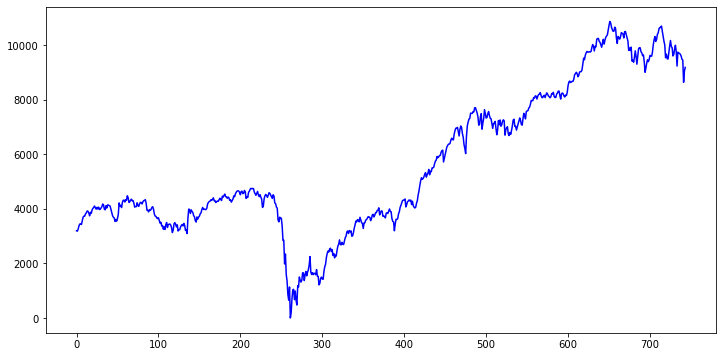

In [120]:
plt.figure(figsize=(12,6))
plt.plot(y_test, "b", label="Original Price")
plt.plot(y_predicted, "r", label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

### Comparison of Models : 

In [172]:
#Compare the results 

compare_model = {"MODEL":pd.Series(["Single Exponential","Holts Winter","Holts winter exp add sea and add trend","Holts winter exp mul sea and add trend","Holts winter exp mul sea and mul trend","Linear Model","Exponential Model","Quadratic Model","ARIMA Model(Non-Stationary)","Auto Regressor(Stationary)","Moving Average(Stationary)","ARIMA(Stationary)","LSTM"]),
                 "RMSE_Values" :pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_mul_add_model,rmse_hwe_mul_add_model,rmse_linear_model,rmse_Exp_model,rmse_Quad_model,RMSE_ARIMA_NS,RMSE_AR,RMSE_MA,RMSE_ARIMA_S,RMSE_LSTM])
                }
table_rmse=pd.DataFrame(compare_model)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
12,LSTM,0.247542
9,Auto Regressor(Stationary),0.383405
10,Moving Average(Stationary),0.488174
11,ARIMA(Stationary),0.488174
2,Holts winter exp add sea and add trend,0.879272
3,Holts winter exp mul sea and add trend,0.879362
4,Holts winter exp mul sea and mul trend,0.879362
0,Single Exponential,1.048969
8,ARIMA Model(Non-Stationary),1.050005
1,Holts Winter,1.341600


After comparing all RMSE of above models we have found that 
LSTM Model has least least RMSE value=0.247542

## Final Model : 

In [122]:
df = pd.read_csv("NSE_Extracted_data.csv", header=0, index_col=0, parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Turnover,Index_Name
Date,,,,,,,
2012-03-01,5366.00,5372.45,5297.50,5339.75,196867905,6.847630e+10,NIFTY 50
2012-03-02,5369.45,5392.55,5315.05,5359.35,185021526,6.768520e+10,NIFTY 50
2012-03-03,5360.05,5369.60,5353.40,5359.40,16770991,4.293500e+09,NIFTY 50
2012-03-05,5342.55,5344.50,5265.70,5280.35,196421155,6.036630e+10,NIFTY 50
2012-03-06,5266.00,5382.05,5206.40,5222.40,290396014,9.319010e+10,NIFTY 50


In [123]:
data = df[["Close"]].values
data

array([[ 5339.75],
       [ 5359.35],
       [ 5359.4 ],
       ...,
       [16247.95],
       [16658.4 ],
       [16793.9 ]])

In [124]:
#Using MinMaxScaler for normalizing data between 0 & 1 :

from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler(feature_range=(0,1))
data_scaled = normalizer.fit_transform(np.array(data).reshape(-1,1))

In [125]:
len(data_scaled)

2477

In [126]:
#Defining test and train dataset :

train_size = int(len(data_scaled)*0.70)
test_size = len(data_scaled) - train_size

print("Train Size :",train_size)
print("Test Size :",test_size)

Train Size : 1733
Test Size : 744


In [127]:
#Splitting data between train and test :

data_train, data_test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:1]

print("Training Size :",len(data_train))
print("Testing Size :",len(data_test))

Training Size : 1733
Testing Size : 744


In [128]:
#Creating dataset in time series for LSTM model : 

def create_data(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [129]:
#Taking 100 days price as one record for training :

time_stamp = 100

X_train, y_train = create_data(data_train,time_stamp)
X_test, y_test = create_data(data_test,time_stamp)

In [130]:
X_train.shape, y_train.shape

((1632, 100), (1632,))

In [131]:
X_test.shape, y_test.shape

((643, 100), (643,))

In [132]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [133]:
#Creating LSTM model using keras :

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [134]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
26/26 [==============================] - 20s 436ms/step - loss: 0.0150 - val_loss: 0.0061
Epoch 2/100
26/26 [==============================] - 8s 304ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 3/100
26/26 [==============================] - 8s 301ms/step - loss: 3.2797e-04 - val_loss: 0.0018
Epoch 4/100
26/26 [==============================] - 8s 322ms/step - loss: 2.7187e-04 - val_loss: 0.0020
Epoch 5/100
26/26 [==============================] - 8s 320ms/step - loss: 2.5718e-04 - val_loss: 0.0023
Epoch 6/100
26/26 [==============================] - 8s 293ms/step - loss: 2.5546e-04 - val_loss: 0.0022
Epoch 7/100
26/26 [==============================] - 7s 283ms/step - loss: 2.4940e-04 - val_loss: 0.0021
Epoch 8/100
26/26 [==============================] - 7s 281ms/step - loss: 2.4292e-04 - val_loss: 0.0027
Epoch 9/100
26/26 [==============================] - 7s 283ms/step - loss: 2.3871e-04 - val_loss: 0.0026
Epoch 10/100
26/26 [==============================] - 7s 280ms

Epoch 78/100
26/26 [==============================] - 7s 281ms/step - loss: 7.9124e-05 - val_loss: 8.0232e-04
Epoch 79/100
26/26 [==============================] - 7s 280ms/step - loss: 7.9461e-05 - val_loss: 4.2186e-04
Epoch 80/100
26/26 [==============================] - 7s 280ms/step - loss: 7.9901e-05 - val_loss: 0.0011
Epoch 81/100
26/26 [==============================] - 7s 287ms/step - loss: 7.4037e-05 - val_loss: 8.5813e-04
Epoch 82/100
26/26 [==============================] - 7s 284ms/step - loss: 7.2635e-05 - val_loss: 6.6977e-04
Epoch 83/100
26/26 [==============================] - 7s 280ms/step - loss: 7.2403e-05 - val_loss: 8.7467e-04
Epoch 84/100
26/26 [==============================] - 7s 288ms/step - loss: 7.1980e-05 - val_loss: 0.0010
Epoch 85/100
26/26 [==============================] - 7s 283ms/step - loss: 7.5423e-05 - val_loss: 3.9142e-04
Epoch 86/100
26/26 [==============================] - 7s 282ms/step - loss: 8.1538e-05 - val_loss: 0.0014
Epoch 87/100
26/26 [==

In [135]:
model.save("keras_model.h5")

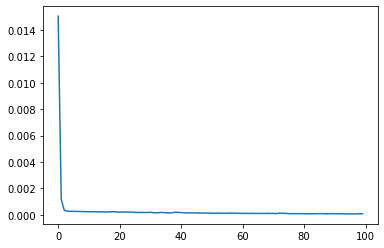

In [136]:
#PLotting loss, it shows that loss has decreased significantly and model trained well :

loss = model.history.history['loss']
plt.plot(loss)

In [137]:
#Predicitng on train and test data :

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [138]:
#Inverse transform to get actual value :

train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

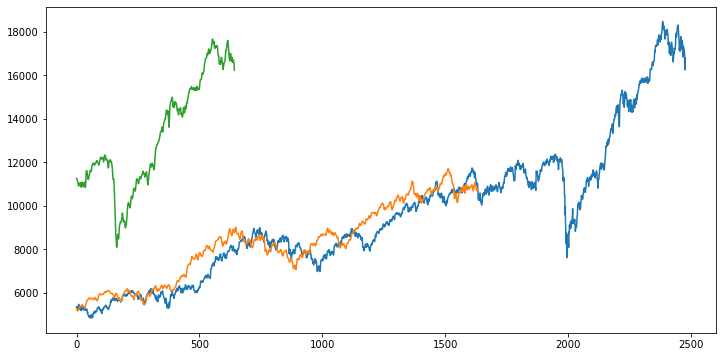

In [139]:
#Comparing using visuals :

plt.figure(figsize=(12,6))
plt.plot(normalizer.inverse_transform(data_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [140]:
type(train_predict)

numpy.ndarray

In [141]:
test = np.vstack((train_predict, test_predict))

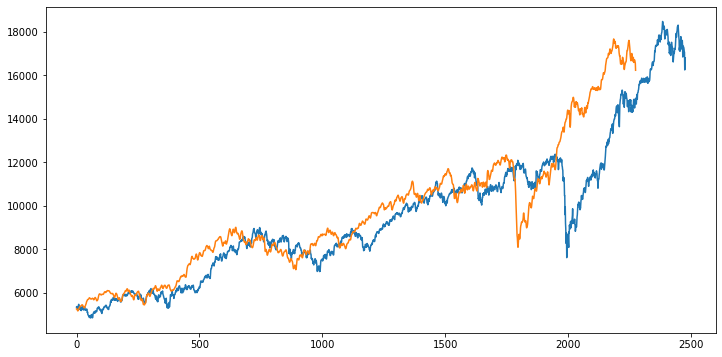

In [142]:
#Combining the predited data to create uniform data visualization :

plt.figure(figsize=(12,6))
plt.plot(normalizer.inverse_transform(data_scaled))
plt.plot(test)

In [143]:
len(data_test)

744

In [144]:
#Getting the last 100 days records :

fut_inp = data_test[644:]

In [145]:
fut_inp = fut_inp.reshape(1,-1)

In [146]:
tmp_inp = list(fut_inp)

In [147]:
fut_inp.shape

(1, 100)

In [148]:
#Creating list of the last 100 data :

tmp_inp = tmp_inp[0].tolist()

In [149]:
#Predicting next 30 days price suing the current data :
#It will predict in sliding window manner (algorithm) with stride 1 :

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.8293552398681641], [0.8187162280082703], [0.8026124835014343], [0.7859496474266052], [0.7698469758033752], [0.7542807459831238], [0.7390454411506653], [0.7239532470703125], [0.7088574767112732], [0.6936537623405457], [0.6782817840576172], [0.662722647190094], [0.6469915509223938], [0.6311318874359131], [0.615205705165863], [0.5992870926856995], [0.5834562182426453], [0.5677958130836487], [0.5523881316184998], [0.5373140573501587], [0.5226529836654663], [0.5084812045097351], [0.49487343430519104], [0.4819006323814392], [0.4696296751499176], [0.4581215977668762], [0.4474301338195801], [0.4375995695590973], [0.42866355180740356], [0.42064332962036133]]


In [150]:
len(data_scaled)

2477

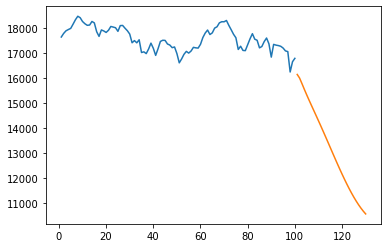

In [151]:
#Creating a dummy plane to plot graph one after another :

plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

plt.plot(plot_new, normalizer.inverse_transform(data_scaled[2377:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [152]:
data_new = data_scaled.tolist()
len(data_new)

2477

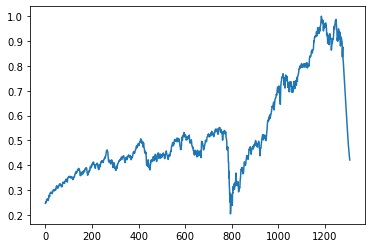

In [153]:
#Entends helps us to fill the missing value with approx value :
data_new.extend(lst_output)
plt.plot(data_new[1200:])

In [154]:
#Creating final data for plotting :

final_graph = normalizer.inverse_transform(data_new).tolist()

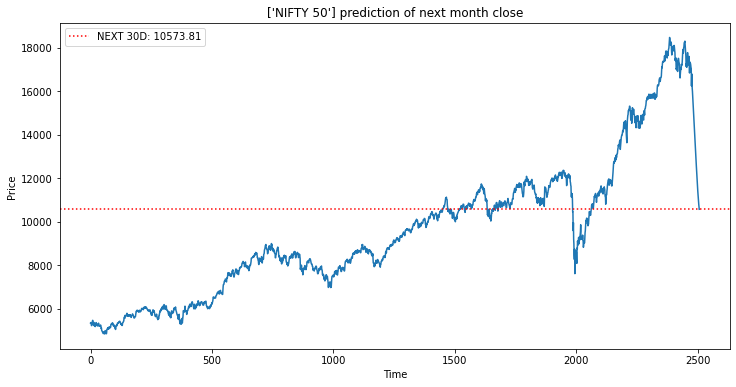

In [173]:
#Plotting final results with predicted value after 30 Days :

plt.figure(figsize=(12,6))
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month close".format(symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [156]:
future_30days_data = normalizer.inverse_transform(lst_output)
future_30days_data

array([[16149.2166],
       [16004.0856],
       [15784.4079],
       [15557.1035],
       [15337.4405],
       [15125.0954],
       [14917.2645],
       [14711.3858],
       [14505.4584],
       [14298.0584],
       [14088.3631],
       [13876.1147],
       [13661.5205],
       [13445.1725],
       [13227.9171],
       [13010.7649],
       [12794.8097],
       [12581.1798],
       [12370.9975],
       [12165.366 ],
       [11965.3684],
       [11772.0455],
       [11586.4165],
       [11409.4493],
       [11242.0563],
       [11085.07  ],
       [10939.2234],
       [10805.1208],
       [10683.221 ],
       [10573.8139]])